In [31]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [32]:
actions = ['yes_line', 'no_line']
data = np.concatenate([
    np.load("/Users/computer1/anaconda3/mydev/dataset/seq_no_line_1689570176.npy"),
    np.load("/Users/computer1/anaconda3/mydev/dataset/seq_yes_line_1689570176.npy")
    
], axis=0)


data.shape

(230, 30, 104)

In [33]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(230, 30, 103)
(230,)


In [34]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(230, 2)

In [35]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=120)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(207, 30, 103) (207, 2)
(23, 30, 103) (23, 2)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),#원래 1024가 아니라 32였음 
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                43008     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 45154 (176.38 KB)
Trainable params: 45154 (176.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
5/7 [====================>.........] - ETA: 0s - loss: 2.2827 - acc: 0.6687 
Epoch 1: val_acc improved from -inf to 0.86957, saving model to models/model.h5
7/7 [==============================] - 4s 101ms/step - loss: 1.8999 - acc: 0.6763 - val_loss: 0.3286 - val_acc: 0.8696 - lr: 0.0010
Epoch 2/200
4/7 [================>.............] - ETA: 0s - loss: 0.1894 - acc: 0.9297

/Users/computer1/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_acc improved from 0.86957 to 0.95652, saving model to models/model.h5
7/7 [==============================] - 0s 34ms/step - loss: 0.1410 - acc: 0.9469 - val_loss: 0.1132 - val_acc: 0.9565 - lr: 0.0010
Epoch 3/200
6/7 [========================>.....] - ETA: 0s - loss: 0.0381 - acc: 0.9792
Epoch 3: val_acc improved from 0.95652 to 1.00000, saving model to models/model.h5
7/7 [==============================] - 0s 39ms/step - loss: 0.0373 - acc: 0.9807 - val_loss: 0.0301 - val_acc: 1.0000 - lr: 0.0010
Epoch 4/200
4/7 [================>.............] - ETA: 0s - loss: 0.0172 - acc: 0.9844
Epoch 4: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 23ms/step - loss: 0.0145 - acc: 0.9903 - val_loss: 0.0019 - val_acc: 1.0000 - lr: 0.0010
Epoch 5/200
4/7 [================>.............] - ETA: 0s - loss: 8.5042e-04 - acc: 1.0000
Epoch 5: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 22ms/step - loss: 0.0012 - acc: 1.0000

Epoch 32/200
7/7 [==============================] - ETA: 0s - loss: 4.9010e-06 - acc: 1.0000
Epoch 32: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 43ms/step - loss: 4.9010e-06 - acc: 1.0000 - val_loss: 4.7681e-06 - val_acc: 1.0000 - lr: 0.0010
Epoch 33/200
5/7 [====================>.........] - ETA: 0s - loss: 3.4718e-06 - acc: 1.0000
Epoch 33: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 36ms/step - loss: 4.3644e-06 - acc: 1.0000 - val_loss: 4.3691e-06 - val_acc: 1.0000 - lr: 0.0010
Epoch 34/200
7/7 [==============================] - ETA: 0s - loss: 3.9164e-06 - acc: 1.0000
Epoch 34: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 27ms/step - loss: 3.9164e-06 - acc: 1.0000 - val_loss: 4.0167e-06 - val_acc: 1.0000 - lr: 0.0010
Epoch 35/200
7/7 [==============================] - ETA: 0s - loss: 3.5697e-06 - acc: 1.0000
Epoch 35: val_acc did not improve from 1.00000
7/7 [==================

Epoch 61/200
7/7 [==============================] - ETA: 0s - loss: 7.9184e-07 - acc: 1.0000
Epoch 61: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 25ms/step - loss: 7.9184e-07 - acc: 1.0000 - val_loss: 1.0055e-06 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 62/200
7/7 [==============================] - ETA: 0s - loss: 7.6823e-07 - acc: 1.0000
Epoch 62: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 30ms/step - loss: 7.6823e-07 - acc: 1.0000 - val_loss: 9.7958e-07 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 63/200
6/7 [========================>.....] - ETA: 0s - loss: 8.0900e-07 - acc: 1.0000
Epoch 63: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 30ms/step - loss: 7.5210e-07 - acc: 1.0000 - val_loss: 9.4848e-07 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 64/200
6/7 [========================>.....] - ETA: 0s - loss: 7.8230e-07 - acc: 1.0000
Epoch 64: val_acc did not improve from 1.00000
7/7 [======

Epoch 90/200
6/7 [========================>.....] - ETA: 0s - loss: 3.1541e-07 - acc: 1.0000
Epoch 90: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 45ms/step - loss: 3.9679e-07 - acc: 1.0000 - val_loss: 5.1312e-07 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 91/200
5/7 [====================>.........] - ETA: 0s - loss: 3.3602e-07 - acc: 1.0000
Epoch 91: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 34ms/step - loss: 3.8987e-07 - acc: 1.0000 - val_loss: 4.9757e-07 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 92/200
4/7 [================>.............] - ETA: 0s - loss: 1.8161e-07 - acc: 1.0000
Epoch 92: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 24ms/step - loss: 3.8066e-07 - acc: 1.0000 - val_loss: 4.9238e-07 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 93/200
5/7 [====================>.........] - ETA: 0s - loss: 3.7029e-07 - acc: 1.0000
Epoch 93: val_acc did not improve from 1.00000
7/7 [======

Epoch 119/200
5/7 [====================>.........] - ETA: 0s - loss: 3.1218e-07 - acc: 1.0000
Epoch 119: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 26ms/step - loss: 2.6894e-07 - acc: 1.0000 - val_loss: 3.4208e-07 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 120/200
5/7 [====================>.........] - ETA: 0s - loss: 2.4065e-07 - acc: 1.0000
Epoch 120: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 33ms/step - loss: 2.6664e-07 - acc: 1.0000 - val_loss: 3.4208e-07 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 121/200
5/7 [====================>.........] - ETA: 0s - loss: 2.1532e-07 - acc: 1.0000
Epoch 121: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 23ms/step - loss: 2.6376e-07 - acc: 1.0000 - val_loss: 3.3689e-07 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 122/200
5/7 [====================>.........] - ETA: 0s - loss: 3.0771e-07 - acc: 1.0000
Epoch 122: val_acc did not improve from 1.00000
7/7

Epoch 148/200
5/7 [====================>.........] - ETA: 0s - loss: 2.4363e-07 - acc: 1.0000
Epoch 148: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 19ms/step - loss: 2.1193e-07 - acc: 1.0000 - val_loss: 2.7470e-07 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 149/200
5/7 [====================>.........] - ETA: 0s - loss: 2.2575e-07 - acc: 1.0000
Epoch 149: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 18ms/step - loss: 2.1020e-07 - acc: 1.0000 - val_loss: 2.6952e-07 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 150/200
4/7 [================>.............] - ETA: 0s - loss: 2.7381e-07 - acc: 1.0000
Epoch 150: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 23ms/step - loss: 2.0674e-07 - acc: 1.0000 - val_loss: 2.6952e-07 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 151/200
5/7 [====================>.........] - ETA: 0s - loss: 2.1458e-07 - acc: 1.0000
Epoch 151: val_acc did not improve from 1.00000
7/7

7/7 [==============================] - 0s 26ms/step - loss: 1.7968e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000 - lr: 1.2500e-04
Epoch 177/200
5/7 [====================>.........] - ETA: 0s - loss: 2.0936e-07 - acc: 1.0000
Epoch 177: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 23ms/step - loss: 1.7853e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000 - lr: 1.2500e-04
Epoch 178/200
5/7 [====================>.........] - ETA: 0s - loss: 1.3784e-07 - acc: 1.0000
Epoch 178: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 21ms/step - loss: 1.7853e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000 - lr: 1.2500e-04
Epoch 179/200
5/7 [====================>.........] - ETA: 0s - loss: 2.2426e-07 - acc: 1.0000
Epoch 179: val_acc did not improve from 1.00000
7/7 [==============================] - 0s 20ms/step - loss: 1.7795e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000 - lr: 1.2500e-04
Ep

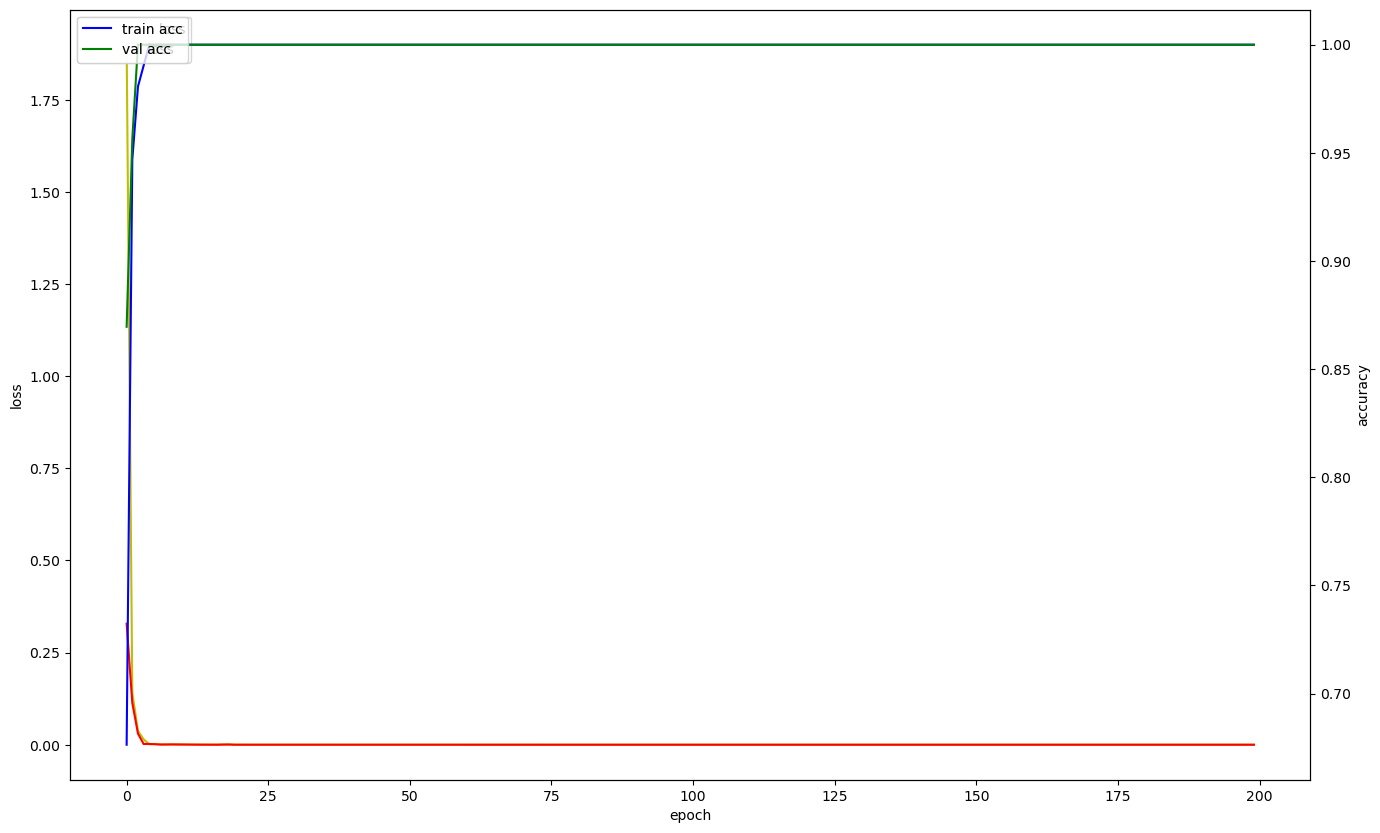

In [38]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [39]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

1/1 [==============================] - 0s 255ms/step


array([[[13,  0],
        [ 0, 10]],

       [[10,  0],
        [ 0, 13]]])